# Entropy for MNIST dataset

This notebook will demonstrate how to calculate the entropy for the image in the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) for the respective gray-scale images.

## Entropy

Entropy for _discrete_ variables is defined as if we have some random variable $X \sim )$ where $x$ is sampled from $p(x)$ and $p(x)$ is a probability density function then the entropy $H(X)$ is:

$$H(X) = -\sum p(x)\log(p(x))$$

For more details refer to: [link](http://www.cs-114.org/wp-content/uploads/2015/01/Elements_of_Information_Theory_Elements.pdf)

If we consider a grayscale image for example from the MNIST dataset:

In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np

from utils.functions import *

torch.backends.cudnn.enabled = False

In [2]:
data=torchvision.datasets.MNIST(root='data/', download=True, \
                                    transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize((0.0,),(1/255.0,))])
                               )
data_loader=torch.utils.data.DataLoader(data)
examples = enumerate(data_loader)
_, (image, label) = next(examples)

Note, that originally the images are represented as a floating point numbers between 0 and 1, corresponding to the range between 0-255,which are the original RGB values and therefore we multiply them back to the range between 0-255 to enforce quantization of the respective pixels. 

In [3]:
print(image,label)
print(image.shape)

tensor([[[[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
             0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
             0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
             0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
             0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
             0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
             0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
             0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
             0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
             0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.

             0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000]]]]) tensor([5])
torch.Size([1, 1, 28, 28])


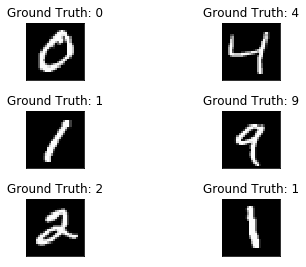

In [4]:
fig = plt.figure()
for i in range(6):
      plt.subplot(3,2,i+1)
      plt.tight_layout()
      _, (image, label) = next(examples)
      plt.imshow(torch.squeeze(image), cmap='gray', interpolation='none')
      plt.title("Ground Truth: {}".format(label.item()))
      plt.xticks([])
      plt.yticks([])

Now if we want to get an entropy of a single image we need to find the probability density function $p(x)$ across the pixel values in the image. The easiest way how to get that distribution, given that the individual pixels are independent, is to create a histogram of the pixel values: 

In [5]:
image, label = data[random.randint(0,len(data)-1)]
image = image.numpy()
image = image.astype(np.uint8)

This is the original image: 

([], <a list of 0 Text yticklabel objects>)

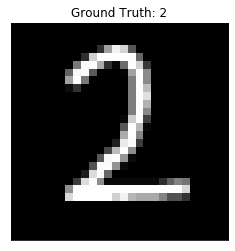

In [6]:
fig = plt.figure()
plt.imshow(np.squeeze(image), cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(label))
plt.xticks([])
plt.yticks([])

In [7]:
print(image)

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0  47 159 243 210  86   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0  47 206 252 253 253 253 252 102
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0 121 250 253 169  48   8 108 253 208
    57   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  98 245 253  91   2   0   0   3 161 253
   137   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0 160 253 120   2   0   0   0   0 125 253
   137   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  13  50   2   0  

In [8]:
counts, bins = np.histogram(image, bins = 256)

(array([650.,   0.,   3.,   1.,   0.,   0.,   0.,   0.,   2.,   8.,   2.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   2.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   3.,   0.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   1., 

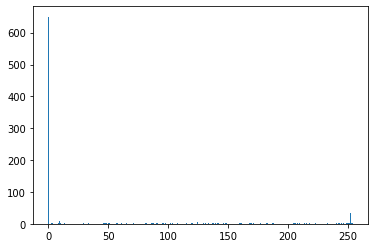

In [9]:
fig = plt.figure()
plt.hist(bins[:-1], bins, weights=counts)

And now we are going to simply calculate the entropy over all the values in the histogram. First we need to convert them into a valid prbability density function and we can do so by dividing all values by the number of the pixels, which is in this case 28*28

In [10]:
counts = np.array((counts),dtype=np.float32)
counts/=28*28
print(counts)

[0.82908165 0.         0.00382653 0.00127551 0.         0.
 0.         0.         0.00255102 0.01020408 0.00255102 0.
 0.         0.00127551 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00127551
 0.         0.         0.         0.00127551 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00127551 0.00255102
 0.00127551 0.         0.00127551 0.00127551 0.         0.
 0.         0.         0.         0.00127551 0.00127551 0.
 0.         0.00127551 0.         0.         0.         0.00127551
 0.         0.         0.         0.         0.         0.00127551
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00127551 0.00255102 0.
 0.         0.         0.00127551 0.00127551 0.00127551 0.
 0.         0.00127551 0.         0.         0.         0.
 0.00127551 0.         0

In [11]:
H_X = 0.0
for p_x in counts:
    if p_x:
        H_X-=p_x * np.log2(p_x)
print(H_X)

1.550742769613862


In [12]:
# For reference:
import skimage    
entropy = skimage.measure.shannon_entropy(image)
print(entropy)

1.550742810016934
